PyTorch has two primitives to work with data: torch.utils.data.DataLoader and torch.utils.data.Dataset. Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset.

In [173]:
# Imporing required Python libraries 
# torch: Base PyTorch library.
# DataLoader: For batching and iterating over data.
# datasets: Provides built-in datasets (e.g., FashionMNIST).
# ToTensor: Converts images to PyTorch tensors.
# matplotlib: For visualization.

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

PyTorch offers domain-specific libraries such as TorchText, TorchVision, and TorchAudio, all of which include datasets. For this tutorial, we will be using a TorchVision dataset.

The torchvision.datasets module contains Dataset objects for many real-world vision data like CIFAR, COCO (full list here). In this tutorial, we use the FashionMNIST dataset. Every TorchVision Dataset includes two arguments: transform and target_transform to modify the samples and labels respectively.



In [174]:
# Loading FashionMNIST Dataset to load 60,000 training and 10,000 test images. 

from torchvision.datasets import FashionMNIST
train = FashionMNIST('./fashionmnist_folder', train=True, download=True)

In [175]:
# Inspecting the Dataset
train

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./fashionmnist_folder
    Split: Train

In [176]:
# Accessing Data Sample
train[0]

(<PIL.Image.Image image mode=L size=28x28>, 9)

In [177]:
# Visualize 1st image from the dataset
    
image,label = train[0]

In [178]:
# Each image is a 28x28 grayscale image, labels are integers 0–9, representing categories like T-shirt (0) or Ankle boot (9).

image

In [179]:
label

9

In [180]:
# Visualize 7th image from the dataset

image,label = train[7]

In [181]:
image

In [182]:
label

2

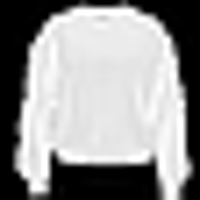

In [183]:
# Resizing an Image using matplotlib to display the PIL image.

from PIL import Image
new_image = image.resize((200,200))
new_image

In [184]:
# Download training data from open datasets.

# Transforming Images to Tensors since Neural networks require data in tensor format. (It works with numerical tensors, not images.)
# ToTensor() converts images to tensors. Pixel values are normalized to [0, 1]. 

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [185]:
from google.colab import drive
drive.mount('/content/drive')

In [186]:
# Checking Transformed Data Structure
# Sample Inspection of the transformed data
training_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [187]:
# Displays the dataset structure after transformation 
# Original images are [H, W] or [H, W, C] (grayscale, so C=1); 
# post-transformation, tensors are [1, 28, 28], with values normalized to [0,1] by dividing by 255.
training_data[1]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000,
           0.0000, 0.0000, 0.1608, 0.7373, 0.4039, 0.2118, 0.1882, 0.1686,
           0.3412, 0.6588, 0.5216, 0.0627, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000, 0.1922,
           0.5333, 0.8588, 0.8471, 0.8941, 0.9255, 1.0000, 1.0000, 1.0000,
           1.0000, 0.8510, 0.8431, 0.9961, 0.9059, 0.6275, 0.1765, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0549, 0.6902, 0.8706,
           0.8784, 0.8314, 0.7961, 0.7765, 0.7686, 0.7843, 0.8431, 0.8000,
           0.7922, 0.7882, 0.7882, 0.7882, 0.8196, 0.8549, 0.8784, 0.6431,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7373, 0.8588, 0.7843,
           0.7765, 0.7922, 0.7765, 0.7804, 0.7804, 0.7882, 0.7686, 0.7765,
           0.7765, 0.7843, 0.7843, 0.7843, 

In [188]:
# Each image is a tensor of shape [1, 28, 28] (grayscale). Labels are integers (0–9)
# Accessing Tensor Data
image,tag = training_data[0]

In [189]:
# Visualizing Tensor Data
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [190]:
# Displays the transformed tensor
tag

9

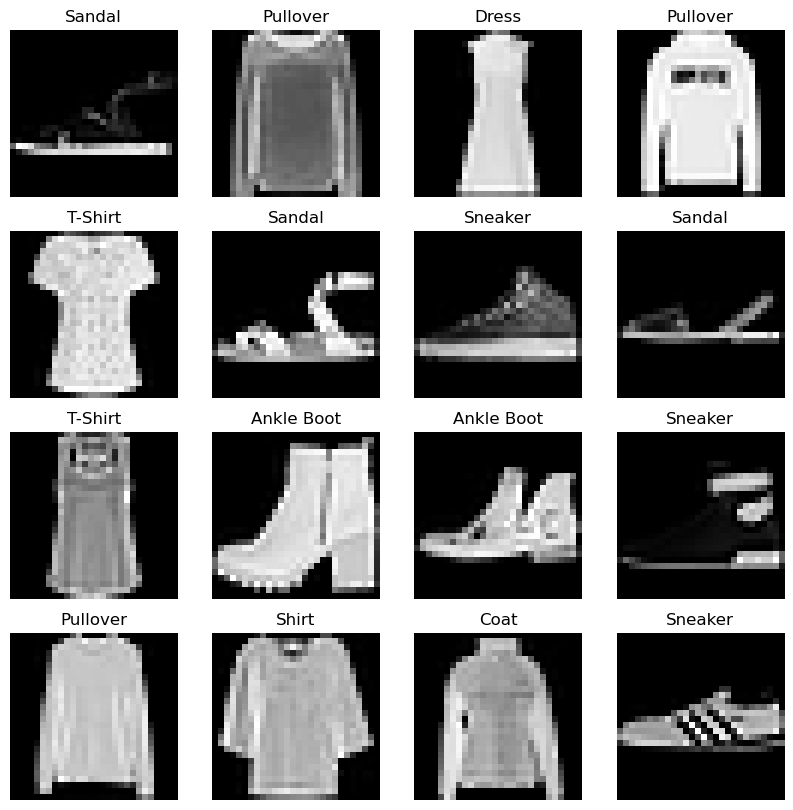

In [191]:
# Maps integer labels (0–9) to actual clothing names Each label is an integer between 0 and 9. We define a dictionary to map integers to class names.
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

# Displaying Multiple Sample Images 
# matplotlib.pyplot to display a grid of images with labels, e.g., showing 16 images with titles like "T-shirt" or "Ankle boot."
figure = plt.figure(figsize=(10, 10))
cols, rows = 4, 4
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

We pass the Dataset as an argument to DataLoader. This wraps an iterable over our dataset, and supports automatic batching, sampling, shuffling and multiprocess data loading. Here we define a batch size of 64, i.e. each element in the dataloader iterable will return a batch of 64 features and labels.

In [192]:
# Data Loading with DataLoader

batch_size = 64

# Create data loaders. Each batch is a tuple of (images, labels), where images are [64, 1, 28, 28] tensors and labels are [64] tensors of integers.
# Data loaders are created using torch.utils.data.DataLoader, wrapping the dataset for batch processing (e.g., batch size of 64). 
# This enables efficient iteration over data, shuffling for training to randomize order making it easier to digest large datasets.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [193]:
train_dataloader

In [194]:
# Checking DataLoader Output

for image,label in train_dataloader:
  print(image)
  print(label)
  print(len(image))

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

Creating Models
To define a neural network in PyTorch, we create a class that inherits from nn.Module. We define the layers of the network in the __init__ function and specify how data will pass through the network in the forward function. To accelerate operations in the neural network, we move it to the GPU if available.

In [195]:
# Get cpu or gpu device for training.
# Defining the Neural Network
# The model is structured using 3 fully connected layers: 
# Input layer: 28×28 → 512 neurons
# Hidden layer: 512 → 512 neurons
# Output layer: 512 → 10 neurons (one for each clothing category)
# Activation function: ReLU for non-linearity.
# Uses GPU if available for faster computation.

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Define model
# A simple feedforward network or CNN, e.g., flattening the image, then passing through linear layers with ReLU activations, ending with 10 outputs (one per class).
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Optimizing the Model Parameters
To train a model, we need a loss function and an optimizer.



In [196]:
# Defining Loss Function and Optimizer 
# Loss function (CrossEntropyLoss): Measures how well the model’s predictions match true labels. Suitable for classification tasks.
# Optimizer (SGD - Stochastic Gradient Descent): Adjusts weights based on loss. Learning rate 1e-3 determines step size for updates.

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In a single training loop, the model makes predictions on the training dataset (fed to it in batches), and backpropagates the prediction error to adjust the model’s parameters.

In [197]:
# Training the Model
# Training Steps: Initialize loss function and optimizer.
# Loop over epochs, processing each batch: forward pass (predict), compute loss, backward pass (compute gradients), update parameters.
# Monitor progress, e.g., print loss every 100 batches.

def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error: Calculates loss with loss_fn(pred, y).
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation : optimizer.zero_grad() clears gradients, loss.backward() computes gradients, optimizer.step() updates weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Logs loss every 100 batches.
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

We also check the model’s performance against the test dataset to ensure it is learning.



In [198]:
# Evaluating the Model 
# Testing Process: Sets model to evaluation mode, disables gradient calculation (torch.no_grad()) for efficiency, loops through test dataset and makes predictions and computes average loss and accuracy.

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

The training process is conducted over several iterations (epochs). During each epoch, the model learns parameters to make better predictions. We print the model’s accuracy and loss at each epoch; we’d like to see the accuracy increase and the loss decrease with every epoch.

In [199]:
# Running Training for Multiple Epochs, the for loops through training process for 10 epochs.
# Calls train() and test() for each epoch.

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.302156  [    0/60000]
loss: 2.296168  [ 6400/60000]
loss: 2.274644  [12800/60000]
loss: 2.273255  [19200/60000]
loss: 2.254400  [25600/60000]
loss: 2.222303  [32000/60000]
loss: 2.233451  [38400/60000]
loss: 2.193399  [44800/60000]
loss: 2.196794  [51200/60000]
loss: 2.170733  [57600/60000]
Test Error: 
 Accuracy: 38.5%, Avg loss: 2.162154 

Epoch 2
-------------------------------
loss: 2.177283  [    0/60000]
loss: 2.169285  [ 6400/60000]
loss: 2.107655  [12800/60000]
loss: 2.120969  [19200/60000]
loss: 2.074958  [25600/60000]
loss: 2.013697  [32000/60000]
loss: 2.043443  [38400/60000]
loss: 1.962626  [44800/60000]
loss: 1.968636  [51200/60000]
loss: 1.889816  [57600/60000]
Test Error: 
 Accuracy: 55.5%, Avg loss: 1.892472 

Epoch 3
-------------------------------
loss: 1.933647  [    0/60000]
loss: 1.903489  [ 6400/60000]
loss: 1.781459  [12800/60000]
loss: 1.815745  [19200/60000]
loss: 1.707221  [25600/60000]
loss: 1.661772  [32000/600

Saving Models
A common way to save a model is to serialize the internal state dictionary (containing the model parameters).



In [200]:
# Saving the Model 
# Saves state dictionary with torch.save(model.state_dict(), 'model.pth'), loads with model.load_state_dict(torch.load('model.pth')).
# Stores the trained weights in "model.pth", this allows the model to be reloaded later without retraining.

torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


Loading Models
The process for loading a model includes re-creating the model structure and loading the state dictionary into it.



In [201]:
# Creates a new model instance.
# Loads saved weights from "model.pth". 

model = NeuralNetwork()
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

This model can now be used to make predictions.



In [202]:
# Making Predictions
# Loads the model in evaluation mode (model.eval()).
# Gets a single test image (x) and label (y).
# Passes x through the model to get predictions and finds the highest probability class (argmax(0)).
# Prints predicted and actual class names.

classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

# Preprocesses new image (e.g., load with PIL, convert to tensor), passes through model, gets prediction.
model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"


### Final Thoughts:

- Data Loading: Downloading, transforming, and batching FashionMNIST images.
- Building a Neural Network: A fully connected model with ReLU activation.
- Training the Model: Using cross-entropy loss and stochastic gradient descent.
- Evaluating Performance: Checking test accuracy and loss.
- Saving & Loading the Model: For reuse without retraining.
- Making Predictions: Using a trained model to classify images.